## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP3 INF8460 <br>  Automne 2021 </center>

# 1. Description
Dans ce TP, vous aurez la tâche d’extraire des mots-clés à partir de textes (sous-tâche A) ainsi que leur type (sous-tâche B).  Le problème est un problème de prédiction de séquence à séquence. Pour les sous-tâches A et B, on veut prédire un label en sortie par jeton (token) en entrée.

__Exemple de sortie pour A et B :__

![image.png](attachment:bf8a71b8-ea0c-4852-bdb5-5ced922377ce.png)


__Sous-tâche (A):__ Identification de mots-clé

Exemple de format de soumission attendu : 

__DocID__ &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; __TokenID__  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; __Token__ &emsp;&emsp; __Tag__ <br>
S0370269304007567 &emsp; S0370269304007567-0 &emsp; the &emsp; &emsp; &emsp; O <br>
S0370269304007567 &emsp; S0370269304007567-1 &emsp; oxidation  &emsp; U <br>
S0370269304007567 &emsp; S0370269304007567-2 &emsp; of &emsp; &emsp; &emsp; &ensp; O <br>

__Sous-tâche (B) :__ Classification des mots-clés en types prédéfinis. Dans cette tâche, vous aurez non seulement à identifier les mots-clés mais aussi à leur assigner un type.

Exemple de format de soumission attendu  : 

__DocID__ &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; __TokenID__  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; __Token__ &emsp;&emsp; __Tag__ <br>
S0370269304007567 &emsp; S0370269304007567-0 &emsp; the &emsp; &emsp; &emsp; O <br>
S0370269304007567 &emsp; S0370269304007567-1 &emsp; oxidation &emsp; U-P <br>
S0370269304007567 &emsp; S0370269304007567-2 &emsp; of &emsp; &emsp; &emsp; &ensp; O <br>

Dans ce projet, vous avez le choix de vous attaquer à une seule sous-tâche (A) ou à effectuer les tâches A et B. Dans le cas où vous ne résoudrez que la sous-tâche A, votre projet obtiendra une note maximale de 80%.

Les équipes qui s’attaqueront aux tâches A et B pourront obtenir une note maximale de 100%.


# 2. Libraries Permises
- HuggingFace
- Keras
- ScikitLearn
- NLTK
- SPACY
- Pour toute autre librairie, demandez à votre chargé de laboratoire via le forum du cours sur Moodle


# 3. Infrastructure

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

# 4. Échéance

Fin de la session. La date précise sera indiquée sur Moodle.

# 5. Kaggle

Le TP3-projet se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour l’évaluation de vos approches.  

Pour tester votre système au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Vous verrez deux types de résultats sur votre « private leaderboard » et votre « public leaderboard » :

- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants. 
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation sur Kaggle, vous devrez soumettre un fichier de données submission_test_A.csv et/ou submission_test B.csv du même format que le fichier sample_submission.csv (disponible sur le site de la compétition et Moodle). Submission_test_(A ou B).csv devra contenir pour chaque ligne de votre ensemble de test, la réponse retournée par votre approche, selon le format indiqué dans la compétition. Vous devrez aussi générer le fichier Submission_val_(A ou B).csv sur l’ensemble de validation.

Dans le projet INF8460, notre classement comprendra deux leaderboards distincts : 
- Un leaderboard pour les modèles de la sous-tâche A
- Un leaderboard pour les modèles de la sous-tâche B

Chaque équipe doit soumettre ses résultats à un des leaderboards (A) ou aux deux (A et B), selon son choix. 

# 6. Description Des Données Et Métriques d’Évaluation

Le corpus est un corpus de 500 paragraphes extraits de publications scientifiques dans les domaines de l’informatique, de la physique et de la science des matériaux. 3 types de documents sont fournis dans des fichiers zip pour les ensembles d’entrainement et de validation : 
- Les paragraphes dans les fichiers .txt
- Les documents entiers dont les paragraphes ont été extraits dans des fichiers .xml 
- Les annotations qui indiquent les mots-clés dans des fichiers .ann. Veuillez ne tenir compte que des lignes marquées Ti (T1, T2, etc.)

Notez qu’il vous est possible de travailler uniquement avec les fichiers .txt et .ann (à vous de voir si les xml seront utiles).

Pour l’ensemble de test, seuls les fichiers .txt et .xml sont fournis.

L’ensemble d’entrainement consiste en 350 documents, l’ensemble de validation et de test contiennent chacun 100 documents. 
Nous vous fournissons également 3 csv :
- train.csv
- val.csv
- test.csv
Ces fichiers contiennent tous les jetons (tokens) de chaque document.txt. Vous aurez à compléter la colonne tag au format demandé ci-dessous.

La sortie de votre modèle sera comparée à notre ensemble de référence de test sur Kaggle. Le leaderboard Kaggle utilisera la métrique f1-score.

# 7. Etapes Du TP

A partir du notebook inf8460_A21_TP3 qui est distribué, vous devez réaliser les étapes suivantes. (Notez que les cellules dans le squelette sont là à titre informatif, il est fort probable que vous rajoutiez des sections au fur et à mesure de votre TP).

Ci-dessous définir la constante _PATH_ qui doit être utilisée par votre code pour accéder aux fichiers. Il est attendu que pour la correction, le chargé de lab n'ait qu'à changer la valeur de _PATH_ pour le répertoire où se trouver les fichiers de datasets.

In [1]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 7.0 MB/s 
     |████████████████████████████████| 3.3 MB 58.4 MB/s 
     |████████████████████████████████| 61 kB 448 kB/s 
     |████████████████████████████████| 895 kB 87.5 MB/s 
     |████████████████████████████████| 596 kB 70.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils_hmm import *
from utils_bilstm import *
from utils_format import complete_BILOU
from utils_bert import BertModel, write_to_submission_file, print_model_loss_values_plot

# 7. Etat de l’art (10%)

Décrivez en deux paragraphes, dans une cellule du notebook, l’état de l’art pour la reconnaissance de mots clé et leur annotation. Utilisez le service Google Scholar. Voici quelques mots-clé (non exhaustifs) : Named Entity recognition, NER, entity typing.  

Quelles sont les meilleures techniques de l’état de l’art ?

Named Entity Recognition (NER) is a foundational task in Natural Language Processing because so many downstream tasks depend on it. The goal of NER is to find all of the named people, places, and things within a text document and correctly classify them.

The most popular technique for NER is Conditional Random Fields. But recently with the advancement of deep learning, Recurrent Neural Networks are giving state of the art results for this task. But the difference in accuracies might be just 1 or 2 percent as of now.

There are different deep learning networks or architectures that can be used to solve this problem :

1)Elman and Jordan RNNs

2)LSTMs, BI-LSTMS, LSTM-CRF, BILSTM-CRF

# 8. Sous-tâche A : Identification des mots-clés (65%)
Dans la sous-tâche A, la tâche est de prédire les types BILOU pour les jetons en dehors (Outside), au début (Beginning) ou dans un mot-clé (Inside). Voir plus de détails ci-dessous.

## 8.1 Extraction d’information
En partant des fichiers csv de l’ensemble d’entrainement (train) et de validation (val), générez un fichier train_A_bilou.csv et val_A_bilou.csv de format de type BILOU en complétant la colonne tag des fichiers train.csv et val.csv: 

    B :’Beginning’ :  Premier jeton d’une entité composée de multiples jetons
    I : ‘Inside’ : Jeton interne d’une entité composée de multiples jetons
    L : ‘Last’ : Dernier jeton d’une entité composée de multiples jetons
    O : ‘Outside’: Un jeton qui ne représente pas une entité 
    U : ‘Unit’ : Une entité composée d’un seul jeton

Ici, entité réfère aux mots-clés que vous devez identifier.

In [9]:
# Import initials data
PATH = "data/"
train_csv = pd.read_csv(PATH + "train.csv")
val_csv = pd.read_csv(PATH + "eval.csv")
test_csv = pd.read_csv(PATH + "test.csv")

In [ ]:
# Add the BILOU-A tags to the training dataset
train_data_a = complete_BILOU(train_csv, False, 'train', PATH)
train_data_a.to_csv('train_A_bilou.csv', index=False)

Strating to fill in the  train  dataframe with the right tags...
20 documents have been processed...
40 documents have been processed...
60 documents have been processed...
80 documents have been processed...
100 documents have been processed...
120 documents have been processed...
140 documents have been processed...
160 documents have been processed...
180 documents have been processed...
200 documents have been processed...
220 documents have been processed...
240 documents have been processed...
260 documents have been processed...
280 documents have been processed...
300 documents have been processed...
320 documents have been processed...
340 documents have been processed...
Done!


In [ ]:
# Add the BILOU-A tags to the validation dataset
val_data_a = complete_BILOU(val_csv, False, 'dev', PATH)
val_data_a.to_csv('val_A_bilou.csv', index=False)

Strating to fill in the  dev  dataframe with the right tags...
20 documents have been processed...
40 documents have been processed...
Done!


## 8.2. Présentation des modèles
- Entrainez un modèle à reconnaitre les mots-clés à partir de votre fichier train_A_bilou.csv .
- Votre modèle doit retourner les tags pour l’ensemble de validation et de test en suivant le format indiqué dans sample_submission.csv
- Vous utiliserez le fichier val_A_bilou.csv pour déterminer vos hyper-paramètres optimaux, et effectuer une évaluation de votre modèle. 

### 8.2.1. Préparation communes des données pour les modèles HMM et Bi-LSTM

In [2]:
# Load dataset with tags created previously
train_A_bilou = pd.read_csv("train_A_bilou.csv")
val_A_bilou = pd.read_csv("val_A_bilou.csv")

In [3]:
# Definition of index dictionaries and their inverse
tag_index_A = {"B":0, "I":1, "L":2, "U":3, "O":4}
tag_index_pad_A = {"-PAD-":0, "B":1, "I":2, "L":3, "U":4, "O":5}
reverse_tag_index_A = {v: k for k, v in tag_index_A.items()}
reverse_tag_index_pad_A = {v: k for k, v in tag_index_pad_A.items()}

In [4]:
def create_type_index_dict(train_data, pad_and_oov) :
    # Creation of the vocabulary dictionary
    all_types = list(set(train_data["Token"]))
    types_dict = dict()
    if pad_and_oov :
        for i in range(len(all_types)):
            types_dict[all_types[i]] = i+2
        # Special value for padding
        types_dict['-PAD-'] = 0  
        # Special value for words out of vocabulary
        types_dict['-OOV-'] = 1  
    else :
        for i in range(len(all_types)):
            types_dict[all_types[i]] = i
    return types_dict

In [5]:
# Definition of vocabularies, with or without padding index
types_dict_pad = create_type_index_dict(train_A_bilou, True)
types_dict = create_type_index_dict(train_A_bilou, False)
reverse_type_dict_pad = {v: k for k, v in types_dict_pad.items()}
reverse_type_dict = {v: k for k, v in types_dict.items()}

In [6]:
# Definition of training phrases/tags with their indexed equivalents
train_doc_ids = sorted(set(list(train_A_bilou["DocID"])), key=list(train_A_bilou["DocID"]).index)
train_sentences = [list(train_A_bilou[train_A_bilou["DocID"]==doc_id]["Token"]) for doc_id in train_doc_ids]
train_tags_A = [list(train_A_bilou[train_A_bilou["DocID"]==doc_id]["Tag"]) for doc_id in train_doc_ids]
train_sentences_ids = [[types_dict_pad[word] for word in sentence] for sentence in train_sentences]
train_tags_ids_A = [[tag_index_pad_A[tag] for tag in tags] for tags in train_tags_A]

In [7]:
# Definition of evaluation phrases/tags with their indexed equivalents
val_doc_ids = sorted(set(list(val_A_bilou["DocID"])), key=list(val_A_bilou["DocID"]).index)
val_sentences = [list(val_A_bilou[val_A_bilou["DocID"]==doc_id]["Token"]) for doc_id in val_doc_ids]
val_tags_A = [list(val_A_bilou[val_A_bilou["DocID"]==doc_id]["Tag"]) for doc_id in val_doc_ids]
val_sentences_ids = [[types_dict_pad[word] if word in types_dict_pad else 1 for word in sentence] for sentence in val_sentences]
val_sentences_ids_unpad = [[types_dict[word] if word in types_dict else 1 for word in sentence] for sentence in val_sentences]
val_tags_ids_A = [[tag_index_pad_A[tag] for tag in tags] for tags in val_tags_A]

In [10]:
# Definition of test phrases/tags with their indexed equivalents
test_doc_ids = sorted(set(list(test_csv["DocID"])), key=list(test_csv["DocID"]).index)
test_sentences = [list(test_csv[test_csv["DocID"]==doc_id]["Token"]) for doc_id in test_doc_ids]
test_sentences_ids = [[types_dict_pad[word] if word in types_dict_pad else 1 for word in sentence] for sentence in test_sentences]

In [11]:
len_val_sentences = [len(sentence) for sentence in val_sentences]
len_train_sentences = [len(sentence) for sentence in train_sentences]
len_test_sentences = [len(sentence) for sentence in test_sentences]

### 8.2.2. Hidden Markov Model

In [12]:
# Compute initial and transition matrix
initial_matrix_A, transition_matrix_A = compute_transition_and_initial_matrix(train_A_bilou, tag_index_A)

In [13]:
# Compute emission matrix
emission_matrix_A = compute_emission_matrix(train_A_bilou, types_dict, tag_index_A)

In [14]:
# Transform matrix in distributions
tfd_A, initial_distribution_A, transition_distribution_A, emission_distribution_A = create_distributions(initial_matrix_A, 
                                                                                                  transition_matrix_A, 
                                                                                                  emission_matrix_A) 

In [15]:
# Output values predictions
output_hmm_model_A = get_output_hmm_model(tfd_A, 
                                          initial_distribution_A, 
                                          transition_distribution_A, 
                                          emission_distribution_A, 
                                          val_sentences_ids_unpad, 
                                          reverse_tag_index_A)

### 8.2.3. Modèle Bi-LSTM

In [13]:
# Get the length of the longest sentence
MAX_LENGTH = max(max(len_val_sentences), max(len_train_sentences), max(len_test_sentences))
print(MAX_LENGTH)

388


In [14]:
# Padding on th MAX_LENGTH value
# the tag -PAD- is associated to each word when the sentence is finished
train_sentences_pad = pad_sequences(train_sentences_ids, maxlen=MAX_LENGTH, padding='post')
val_sentences_pad = pad_sequences(val_sentences_ids, maxlen=MAX_LENGTH, padding='post')
test_sentences_pad = pad_sequences(test_sentences_ids, maxlen=MAX_LENGTH, padding='post')

train_tags_pad_A = pad_sequences(train_tags_ids_A, maxlen=MAX_LENGTH, padding='post')
val_tags_pad_A = pad_sequences(val_tags_ids_A, maxlen=MAX_LENGTH, padding='post')

In [15]:
# Creation of the Bi-LSTM model
bi_lstm_A, early_stopping_callback, model_checkpoint_callback = create_bi_lstm_model(MAX_LENGTH, 
                                                                                     types_dict_pad, 
                                                                                     tag_index_pad_A)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 388, 128)          1174656   
                                                                 
 dropout (Dropout)           (None, 388, 128)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 388, 512)         788480    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 388, 6)           3078      
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 388, 6)            0         
                                                                 
Total params: 1,966,214
Trainable params: 1,966,214
Non-

In [16]:
# Training for subtask A
with tensorflow.device('/device:GPU:0'):
    model_history = bi_lstm_A.fit(x=train_sentences_pad, 
                y=to_categorical(train_tags_pad_A, len(tag_index_pad_A)), 
                batch_size=128, 
                epochs=40, 
                validation_data=(val_sentences_pad, to_categorical(val_tags_pad_A, len(tag_index_pad_A))),
                callbacks=[early_stopping_callback,model_checkpoint_callback])

Epoch 1/40
3/3 [==============================] - 4s 236ms/step - loss: 0.8339 - accuracy: 0.2405 - ignore_accuracy: 0.5216 - val_loss: 0.9563 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 2/40
3/3 [==============================] - 1s 207ms/step - loss: 0.7155 - accuracy: 0.3428 - ignore_accuracy: 0.7255 - val_loss: 0.7546 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 3/40
3/3 [==============================] - 1s 209ms/step - loss: 0.5714 - accuracy: 0.3428 - ignore_accuracy: 0.7260 - val_loss: 0.6371 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 4/40
3/3 [==============================] - 1s 196ms/step - loss: 0.5176 - accuracy: 0.3428 - ignore_accuracy: 0.7262 - val_loss: 0.5310 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 5/40
3/3 [==============================] - 1s 200ms/step - loss: 0.4604 - accuracy: 0.3428 - ignore_accuracy: 0.7246 - val_loss: 0.5306 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 6/40
3/3 [====

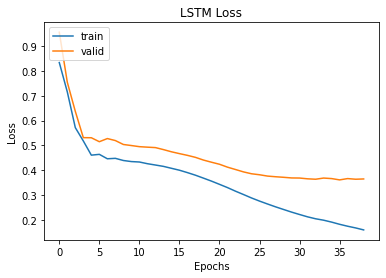

In [17]:
generate_model_history(model_history, 'loss', 'Loss', 'LSTM Loss')

In [18]:
# Predictions for evaluation dataset
output_val_bi_lstm_A = get_output_bilstm(bi_lstm_A, val_sentences_pad, reverse_tag_index_pad_A, len_val_sentences)

In [19]:
# Predictions for test dataset
output_test_bi_lstm_A = get_output_bilstm(bi_lstm_A, test_sentences_pad, reverse_tag_index_pad_A, len_test_sentences)

### 8.2.4. Modèle BERT

#### 8.2.4.1. Entrainement

On commence par instancier un objet de la classe `BertModel` en utilisant le nom du modèle BERT à utiliser (dans ce cas `bert-large-cased`)

In [3]:
bert_model_a = BertModel('bert-base-cased')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Avant d'initialiser les paramètres du modèle, on fait une préparation des données. Cette partie inclue:
* Téléchargement des données `train_A_bilou.csv` dans un dataframe
* Analyse des données pour trouver la longueur maximale des phrases
* Conversion des `tokens` en `input ids` selon `BertTokenizer`
* Ajout des labels null pour les `tokens` supplémentaire ajoutés par BERT

In [4]:
bert_model_a.load_train_data('train_A_bilou.csv')
bert_model_a.analyze_train_sentences_lengths()

Calculating the lengths of sentences according to BERT ...
   Min length: 3 tokens
   Max length: 191 tokens
Median length: 32 tokens
Done!


In [5]:
bert_model_a.prepare_train_data(200)
train_dataset_a = bert_model_a.get_train_tensor_dataset()
bert_model_a.init_model(16, train_dataset_a)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

Une fois, les données sont prêtes, on procède avec l'entrainement du modèle

In [6]:
loss_values_a = bert_model_a.train_model(4)


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:27.
  Batch   120  of    152.    Elapsed: 0:00:40.

  Average training loss: 0.55
  Training epcoh took: 0:00:50

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:40.

  Average training loss: 0.36
  Training epcoh took: 0:00:50

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:39.

  Average training loss: 0.25
  Training epcoh took: 0:00:50

======== Epoch 4 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:39.

  Average training loss: 0.17
  Training epcoh took: 0:00:50

Training comple

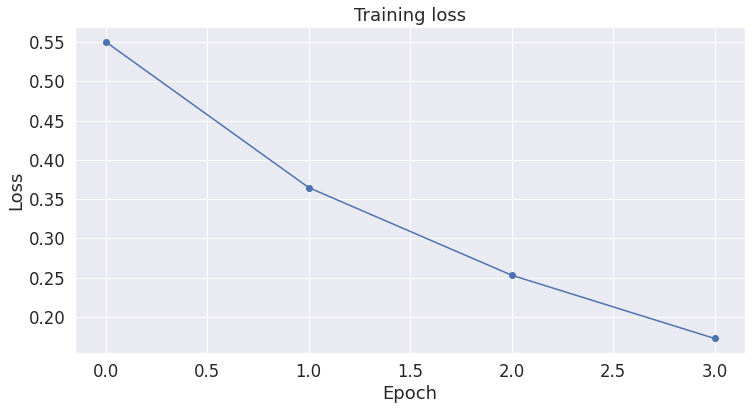

In [7]:
print_model_loss_values_plot(loss_values_a)

#### 8.2.4.2. Prédiction sur les données de validation

Afin de pouvoir utiliser le modèle pour prédire les tags des tokens de l'ensemble de validation, on passe par une préparation de données qui ressemble à celle qu'on a faite sur l'ensemble d'entrainement.

In [8]:
bert_model_a.load_valid_data('val_A_bilou.csv')
bert_model_a.prepare_valid_data(200)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


Ensuite, on applique le modèle entrainée pour avoir toutes les prédictions.

In [9]:
valid_predictions_a = bert_model_a.get_predictions(bert_model_a.get_valid_dataloader(16))

Starting computing predictions ...
Done!


Enfin, on élimine les prédictions qui correspondent aux labels nuls et puis on convertit les prédictions finales en tags.

In [10]:
valid_prediction_labels_a = bert_model_a.convert_bert_predictions_to_precited_labels(valid_predictions_a, bert_model_a.valid_bert_labels)

Before filtering out `null` tokens, length = 82,800
After filtering out `null` tokens, length = 11,161


## 8.3. Évaluation des modèles
Vous devez calculer les métriques de précision, rappel et F1-score de votre modèle sur l’ensemble de validation. Votre fichier val_A_bilou.csv avec la colonne Tag complétée constitue alors votre référence.
- Affichez une table comparant les performances de votre modèle pour chaque tag (B, I, L, O, U) ainsi que la performance globale sous forme de moyenne micro.
- Générez les réponses de votre modèle sur l’ensemble de validation et stockez-les dans le fichier submission_val_A.csv, sur le modèle du fichier sample_submission.csv
- Générez les réponses de votre modèle sur l’ensemble de test et stockez-les dans le fichier submission_test_A.csv sur le modèle du fichier sample_submission.csv
- Kaggle : Vous devez soumettre votre fichier de soumission submission_test_A.csv sur Kaggle, où il sera évalué. Ce fichier doit être généré avec votre meilleur modèle au moment de sa soumission pour évaluation sur Kaggle. Notez que vous pourrez faire des soumissions jusqu’à la date de remise et vous comparer aux performances des autres équipes. 

### 8.3.1. Evaluation de l'ensemble des modèles

In [16]:
print(
    "Classification report for HMM : \n", 
    classification_report(output_hmm_model_A, list(val_A_bilou["Tag"]))
)

Classification report for HMM : 
               precision    recall  f1-score   support

           B       0.32      0.20      0.25      1063
           I       0.30      0.39      0.34       732
           L       0.40      0.49      0.44       567
           O       0.86      0.84      0.85      8625
           U       0.18      0.38      0.24       174

    accuracy                           0.72     11161
   macro avg       0.41      0.46      0.42     11161
weighted avg       0.73      0.72      0.73     11161



In [20]:
print(
    "Classification report for Bi-LSTM : \n", 
    classification_report(output_val_bi_lstm_A, list(val_A_bilou["Tag"]))
)

Classification report for Bi-LSTM : 
               precision    recall  f1-score   support

           B       0.33      0.46      0.39       485
           I       0.42      0.42      0.42       958
           L       0.55      0.58      0.56       663
           O       0.92      0.86      0.89      9011
           U       0.07      0.59      0.12        44

    accuracy                           0.79     11161
   macro avg       0.46      0.58      0.48     11161
weighted avg       0.82      0.79      0.80     11161



In [11]:
print(
    "Classification report for BERT : \n", 
    classification_report(np.concatenate(bert_model_a.valid_labels, axis=0), valid_prediction_labels_a)
)

Classification report for BERT : 
               precision    recall  f1-score   support

           B       0.59      0.73      0.65       676
           I       0.56      0.61      0.58       965
           L       0.71      0.83      0.77       692
           O       0.94      0.90      0.92      8451
           U       0.73      0.68      0.70       377

    accuracy                           0.86     11161
   macro avg       0.70      0.75      0.72     11161
weighted avg       0.86      0.86      0.86     11161



### 8.3.2. Création des fichiers de sortie pour l'ensemble de validation

#### 8.3.2.1. Bi-LSTM

In [21]:
def generate_output(ypred, initial_df, dataset_type, set_type) :
    file_name = "submission_" + dataset_type + "_" + set_type + ".csv"
    df_to_write = pd.DataFrame(initial_df["TokenID"])
    df_to_write["Tag"] = ypred
    df_to_write.to_csv(file_name, index=False)
    print(file_name, "successfully written !")

In [22]:
generate_output(output_val_bi_lstm_A, val_csv, "val", "A")

submission_val_A.csv successfully written !


#### 8.3.2.2. BERT

In [12]:
write_to_submission_file('submission_val_A.csv', bert_model_a.valid_data['TokenID'], valid_prediction_labels_a)
print('submission_val_A.csv successfully written !')

submission_val_A.csv successfully written !


### 8.3.3. Création des fichiers de sortie pour l'ensemble de tests

#### 8.3.3.1. Bi-LSTM

In [23]:
generate_output(output_test_bi_lstm_A, test_csv, "test", "A")

submission_test_A.csv successfully written !


#### 8.3.3.2. BERT

In [14]:
bert_model_a.load_test_data(PATH + 'test.csv')
bert_model_a.labels_map['N'] = 5
bert_model_a.prepare_test_data(200)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


In [15]:
test_predictions_a = bert_model_a.get_predictions(bert_model_a.get_test_dataloader(16))

Starting computing predictions ...
Done!


In [16]:
test_prediction_labels_a = bert_model_a.convert_bert_predictions_to_precited_labels(test_predictions_a, bert_model_a.test_bert_labels)

Before filtering out `null` tokens, length = 165,800
After filtering out `null` tokens, length = 21,711


In [17]:
write_to_submission_file('submission_test_A.csv', bert_model_a.test_data['TokenID'], test_prediction_labels_a)
print('submission_test_A.csv successfully written !')

submission_test_A.csv successfully written !


# 9. Sous-tâche B : Identification des mots-clés et de leurs types (20%)

## 9.1. Extraction d'information
En partant des fichiers csv de l’ensemble d’entrainement (train) et de validation (val), générez un fichier train_B_bilou.csv et val_B_bilou.csv de format de type BILOU en complétant la colonne tag des fichiers train.csv et val.csv: 

    B :’Beginning’ :  Premier jeton d’une entité composée de multiples jetons
    I : ‘Inside’ : Jeton interne d’une entité composée de multiples jetons
    L : ‘Last’ : Dernier jeton d’une entité composée de multiples jetons
    O : ‘Outside’: Un jeton qui ne représente pas une entité 
    U : ‘Unit’ : Une entité composée d’un seul jeton

Ici, entité réfère aux mots-clés que vous devez identifier.
Dans ce cas, il vous faudra créer une annotation B_P, B_M, B_T pour indiquer le début (Beginning) d’un type Process, Material et Task, et ainsi de suite pour les autres tags I, L et U. Les jetons sans types et qui ne représentent pas de mot-clé auront le tag O.



In [ ]:
# Add the tags BILOU-B to the training dataset
train_data_b = complete_BILOU(train_csv, True, 'train', PATH)
train_data_b.to_csv('train_B_bilou.csv', index=False)

Strating to fill in the  train  dataframe with the right tags...
20 documents have been processed...
40 documents have been processed...
60 documents have been processed...
80 documents have been processed...
100 documents have been processed...
120 documents have been processed...
140 documents have been processed...
160 documents have been processed...
180 documents have been processed...
200 documents have been processed...
220 documents have been processed...
240 documents have been processed...
260 documents have been processed...
280 documents have been processed...
300 documents have been processed...
320 documents have been processed...
340 documents have been processed...
Done!


In [ ]:
# Add the tags BILOU-B to the validation dataset
val_data_b = complete_BILOU(val_csv, True, 'dev', PATH)
val_data_b.to_csv('val_B_bilou.csv', index=False)

Strating to fill in the  dev  dataframe with the right tags...
20 documents have been processed...
40 documents have been processed...
Done!


# 9.2. Présentation des modèls
Dans la sous-tâche B, vous devez implémenter un modèle pour prédire les types O, M, P, T pour les jetons qui sont en dehors d’un mot-clé (Outside), ou qui font partie d’un type Material, Process ou Task (les types à annoter). 
- Votre modèle doit retourner les tags pour l’ensemble de validation et de test en suivant le format indiqué dans sample_submission.csv
- Vous utiliserez le fichier val_B_bilou.csv pour déterminer vos hyper-paramètres optimaux, et effectuer une évaluation de votre modèle. 

### 9.2.1. Préparation communes des données pour les modèles HMM et Bi-LSTM

In [17]:
# Load training and evaluationd dataset with tags
train_B_bilou = pd.read_csv("train_B_bilou.csv")
val_B_bilou = pd.read_csv("val_B_bilou.csv")

In [18]:
# Define tag index with/without padding index
tag_index_B = {"B-M":0, "B-P":1, "B-T":2, "I-M":3, "I-P":4, "I-T":5, "L-M":6,
 "L-P":7, "L-T":8, "O":9, "U-M":10, "U-P":11, "U-T":12}
tag_index_pad_B = {"-PAD-":0, "B-M":1, "B-P":2, "B-T":3, "I-M":4, "I-P":5, "I-T":6, "L-M":7,
 "L-P":8, "L-T":9, "O":10, "U-M":11, "U-P":12, "U-T":13}
reverse_tag_index_B = {v: k for k, v in tag_index_B.items()}
reverse_tag_index_pad_B = {v: k for k, v in tag_index_pad_B.items()}

### 9.2.2. Hidden Markov Model

In [19]:
# Compute initial and transition matrix
initial_matrix_B, transition_matrix_B = compute_transition_and_initial_matrix(train_B_bilou, tag_index_B)

In [20]:
# Compute emission matrix
emission_matrix_B = compute_emission_matrix(train_B_bilou, types_dict, tag_index_B)

In [21]:
# Creation of the distributions
tfd_B, initial_distribution_B, transition_distribution_B, observation_distribution_B = create_distributions(initial_matrix_B, 
                                                                                                          transition_matrix_B, 
                                                                                                          emission_matrix_B)

In [22]:
# Predictions
output_hmm_model_B = get_output_hmm_model(tfd_B,
                                          initial_distribution_B, 
                                          transition_distribution_B, 
                                          observation_distribution_B, 
                                          val_sentences_ids_unpad, 
                                          reverse_tag_index_B)

### 9.2.3. Bi-LSTM model

In [26]:
# Definition of training phrases/tags with their indexed equivalents
train_tags_B = [list(train_B_bilou[train_B_bilou["DocID"]==doc_id]["Tag"]) for doc_id in train_doc_ids]
train_tags_ids_B = [[tag_index_pad_B[tag] for tag in tags] for tags in train_tags_B]

In [27]:
# Definition of evaluation phrases/tags with their indexed equivalents
val_tags_B = [list(val_B_bilou[val_B_bilou["DocID"]==doc_id]["Tag"]) for doc_id in val_doc_ids]
val_tags_ids_B = [[tag_index_pad_B[tag] for tag in tags] for tags in val_tags_B]

In [29]:
# Padding on th MAX_LENGTH value
# the tag -PAD- is associated to each word when the sentence is finished
train_tags_pad_B = pad_sequences(train_tags_ids_B, maxlen=MAX_LENGTH, padding='post')
val_tags_pad_B = pad_sequences(val_tags_ids_B, maxlen=MAX_LENGTH, padding='post')

In [30]:
# Creation of the Bi-LSTM model for subtask B
bi_lstm_B, early_stopping_callback, model_checkpoint_callback = create_bi_lstm_model(MAX_LENGTH, 
                                                                                     types_dict_pad, 
                                                                                     tag_index_pad_B)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 388, 128)          1174656   
                                                                 
 dropout_1 (Dropout)         (None, 388, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 388, 512)         788480    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 388, 14)          7182      
 tributed)                                                       
                                                                 
 activation_1 (Activation)   (None, 388, 14)           0         
                                                                 
Total params: 1,970,318
Trainable params: 1,970,318
No

In [31]:
# Training the model
with tensorflow.device('/device:GPU:0'):
    model_history = bi_lstm_B.fit(x=train_sentences_pad, 
                y=to_categorical(train_tags_pad_B, len(tag_index_pad_B)), 
                batch_size=128, 
                epochs=40, 
                validation_data=(val_sentences_pad, to_categorical(val_tags_pad_B, len(tag_index_pad_B))),
                callbacks=[early_stopping_callback,model_checkpoint_callback])

Epoch 1/40
3/3 [==============================] - 1s 220ms/step - loss: 1.2303 - accuracy: 0.2295 - ignore_accuracy: 0.5066 - val_loss: 1.4221 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 2/40
3/3 [==============================] - 1s 202ms/step - loss: 1.0238 - accuracy: 0.3428 - ignore_accuracy: 0.7262 - val_loss: 0.9036 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 3/40
3/3 [==============================] - 1s 199ms/step - loss: 0.7628 - accuracy: 0.3428 - ignore_accuracy: 0.7256 - val_loss: 0.6678 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 4/40
3/3 [==============================] - 0s 165ms/step - loss: 0.6128 - accuracy: 0.3428 - ignore_accuracy: 0.7257 - val_loss: 0.7290 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 5/40
3/3 [==============================] - 1s 196ms/step - loss: 0.6119 - accuracy: 0.3428 - ignore_accuracy: 0.7243 - val_loss: 0.6591 - val_accuracy: 0.4356 - val_ignore_accuracy: 0.7572
Epoch 6/40
3/3 [====

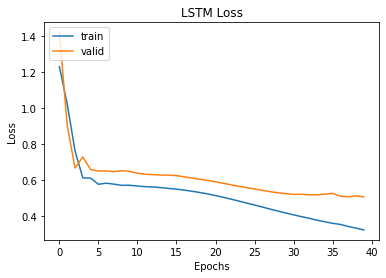

In [32]:
generate_model_history(model_history, 'loss', 'Loss', 'LSTM Loss')

In [33]:
# Predictions for evaluation dataset
output_val_bi_lstm_B = get_output_bilstm(bi_lstm_B, val_sentences_pad, reverse_tag_index_pad_B, len_val_sentences)

In [34]:
# Predictions for test dataset
output_test_bi_lstm_B = get_output_bilstm(bi_lstm_B, test_sentences_pad, reverse_tag_index_pad_B, len_test_sentences)

### 9.2.4. Modèle BERT

#### 9.2.4.1. Entrainement

On commence par l'instanciation d'un objet de la classe `BertModel` en utilisant le nom du modèle BERT à utiliser (dans ce cas `bert-large-cased`)

In [4]:
bert_model_b = BertModel('bert-base-cased')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Avant d'initialiser les paramètres du modèle, on fait une préparation des données. Cette partie inclue:
* Téléchargement des données `train_A_bilou.csv` dans un dataframe
* Analyse des données pour trouver la longueur maximale des phrases
* Conversion des `tokens` en `input ids` selon `BertTokenizer`
* Ajout des labels null pour les `tokens` supplémentaire ajoutés par BERT

In [5]:
bert_model_b.load_train_data('train_B_bilou.csv')
bert_model_b.analyze_train_sentences_lengths()

Calculating the lengths of sentences according to BERT ...
   Min length: 3 tokens
   Max length: 191 tokens
Median length: 32 tokens
Done!


In [6]:
bert_model_b.labels_map = {'B-T':0, 'I-T':1, 'L-T':2, 'U-T':3, 'B-P':4, 'I-P':5, 'L-P':6, 'U-P':7, 'B-M':8, 'I-M':9, 'L-M':10, 'U-M':11, 'O':12}
bert_model_b.reversed_labels_map = {0: 'B-T', 1: 'I-T', 2: 'L-T', 3: 'U-T', 4: 'B-P', 5: 'I-P', 6: 'L-P', 7: 'U-P', 8: 'B-M', 9: 'I-M', 10: 'L-M', 11: 'U-M', 12: 'O'}
bert_model_b.prepare_train_data(200)
train_dataset_b = bert_model_b.get_train_tensor_dataset()
bert_model_b.init_model(16, train_dataset_b)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

Une fois, les données sont prêtes, on procède avec l'entrainement du modèle

In [7]:
loss_values_b = bert_model_b.train_model(4)


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:40.

  Average training loss: 0.82
  Training epcoh took: 0:00:50

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:39.

  Average training loss: 0.55
  Training epcoh took: 0:00:50

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:39.

  Average training loss: 0.41
  Training epcoh took: 0:00:50

======== Epoch 4 / 4 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:13.
  Batch    80  of    152.    Elapsed: 0:00:26.
  Batch   120  of    152.    Elapsed: 0:00:39.

  Average training loss: 0.30
  Training epcoh took: 0:00:50

Training comple

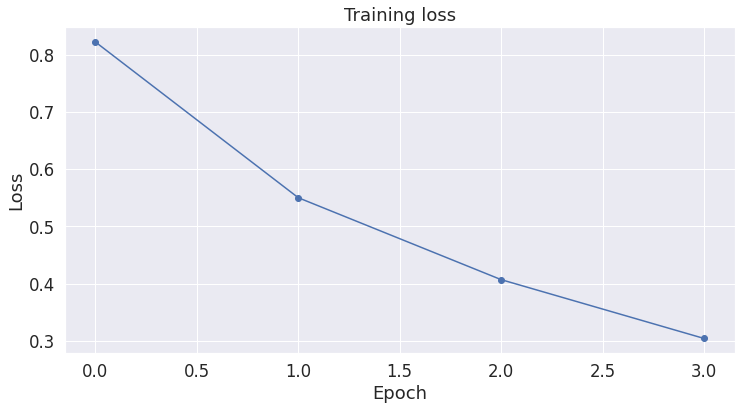

In [8]:
print_model_loss_values_plot(loss_values_b)

#### 9.2.4.2. Prédiction sur les données de validation

Afin de pouvoir utiliser le modèle pour prédire les tags des tokens de l'ensemble de validation, on passe par une préparation de données qui ressemble à celle qu'on a faite sur l'ensemble d'entrainement.

In [9]:
bert_model_b.load_valid_data('val_B_bilou.csv')
bert_model_b.prepare_valid_data(200)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


Ensuite, on applique le modèle entrainée pour avoir toutes les prédictions.

In [10]:
valid_predictions_b = bert_model_b.get_predictions(bert_model_b.get_valid_dataloader(16))

Starting computing predictions ...
Done!


Enfin, on élimine les prédictions qui correspondent aux labels nuls et puis on convertit les prédictions finales en tags.

In [11]:
valid_prediction_labels_b = bert_model_b.convert_bert_predictions_to_precited_labels(valid_predictions_b, bert_model_b.valid_bert_labels)

Before filtering out `null` tokens, length = 82,800
After filtering out `null` tokens, length = 11,161


## 9.3. Évaluation des modèles :
Vous devez calculer les métriques de précision, rappel et F1-score de votre modèle sur l’ensemble de validation. Votre fichier val_B_bilou.csv avec la colonne Tag complétée constitue alors votre référence.
- Affichez une table comparant les performances de votre modèle pour chaque tag (B, I, L, O, U) ainsi que la performance globale sous forme de moyenne micro.
- Générez les réponses de votre modèle sur l’ensemble de validation et stockez-les dans le fichier submission_val_B.csv, sur le modèle du fichier sample_submission.csv
- Générez les réponses de votre modèle sur l’ensemble de test et stockez-les dans le fichier submission_test_B.csv sur le modèle du fichier sample_submission.csv
- Kaggle : Vous devez soumettre votre fichier de soumission submission_test_B.csv sur Kaggle, où il sera évalué. Ce fichier doit être généré avec votre meilleur modèle au moment de sa soumission pour évaluation sur Kaggle. Notez que vous pourrez faire des soumissions jusqu’à la date de remise et vous comparer aux performances des autres équipes. 

__Quelques pistes pour débuter les sous-tâches A et B :__ Bi-LSTM avec plongements lexicaux, CRF, BERT, apprentissage profond.

### 9.3.1. Evaluation de l'ensemble des modèles

In [23]:
print(
    "Classification report for HMM : \n", 
    classification_report(output_hmm_model_B, list(val_B_bilou["Tag"]))
)

Classification report for HMM : 
               precision    recall  f1-score   support

         B-M       0.21      0.05      0.08       928
         B-P       0.19      0.24      0.22       254
         B-T       0.19      0.17      0.18       137
         I-M       0.02      0.06      0.03        53
         I-P       0.15      0.23      0.18       260
         I-T       0.24      0.32      0.27       317
         L-M       0.21      0.34      0.26       149
         L-P       0.25      0.33      0.28       252
         L-T       0.17      0.16      0.16       118
           O       0.84      0.83      0.83      8510
         U-M       0.19      0.41      0.26       127
         U-P       0.13      0.24      0.17        50
         U-T       0.00      0.00      0.00         6

    accuracy                           0.68     11161
   macro avg       0.21      0.26      0.23     11161
weighted avg       0.69      0.68      0.68     11161



In [35]:
print(
    "Classification report for Bi-LSTM : \n", 
    classification_report(output_val_bi_lstm_B, list(val_B_bilou["Tag"]))
)

Classification report for Bi-LSTM : 
               precision    recall  f1-score   support

         B-M       0.00      0.00      0.00         0
         B-P       0.16      0.21      0.18       253
         B-T       0.00      0.00      0.00         0
         I-M       0.00      0.00      0.00         0
         I-P       0.24      0.18      0.21       519
         I-T       0.12      0.25      0.16       216
         L-M       0.00      0.00      0.00         0
         L-P       0.35      0.27      0.31       430
         L-T       0.00      0.00      0.00         0
           O       0.96      0.83      0.89      9743
         U-M       0.00      0.00      0.00         0
         U-P       0.00      0.00      0.00         0
         U-T       0.00      0.00      0.00         0

    accuracy                           0.75     11161
   macro avg       0.14      0.13      0.13     11161
weighted avg       0.87      0.75      0.80     11161



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print(
    "Classification report for BERT : \n", 
    classification_report(np.concatenate(bert_model_b.valid_labels, axis=0), valid_prediction_labels_b)
)

Classification report for BERT : 
               precision    recall  f1-score   support

         B-M       0.63      0.70      0.66       232
         B-P       0.50      0.61      0.55       322
         B-T       0.35      0.43      0.38       122
         I-M       0.55      0.66      0.60       144
         I-P       0.39      0.47      0.43       392
         I-T       0.45      0.44      0.44       429
         L-M       0.67      0.80      0.73       240
         L-P       0.56      0.66      0.60       338
         L-T       0.39      0.38      0.38       114
           O       0.94      0.91      0.93      8451
         U-M       0.77      0.67      0.71       277
         U-P       0.54      0.49      0.51        91
         U-T       0.00      0.00      0.00         9

    accuracy                           0.83     11161
   macro avg       0.52      0.55      0.53     11161
weighted avg       0.84      0.83      0.83     11161



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9.3.2. Création des fichiers de sortie pour l'ensemble de validation

#### 9.3.2.1. Bi-LSTM

In [36]:
generate_output(output_val_bi_lstm_B, val_csv, "val", "B")

submission_val_B.csv successfully written !


#### 9.3.2.2. BERT

In [13]:
write_to_submission_file('submission_val_B.csv', bert_model_b.valid_data['TokenID'], valid_prediction_labels_b)
print('submission_val_A.csv successfully written !')

submission_val_A.csv successfully written !


### 9.3.3. Création des fichiers de sortie pour l'ensemble de tests

#### 9.3.3.1. Bi-LSTM

In [37]:
generate_output(output_test_bi_lstm_B, test_csv, "test", "B")

submission_test_B.csv successfully written !


#### 9.3.3.2. BERT

In [14]:
bert_model_b.load_test_data(PATH + 'test.csv')
bert_model_b.labels_map['N'] = 13
bert_model_b.prepare_test_data(200)

Generating input ids for all the tokens according to BERT ...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Done!


In [15]:
test_predictions_b = bert_model_b.get_predictions(bert_model_b.get_test_dataloader(16))

Starting computing predictions ...
Done!


In [16]:
test_prediction_labels_b = bert_model_b.convert_bert_predictions_to_precited_labels(test_predictions_b, bert_model_b.test_bert_labels)

Before filtering out `null` tokens, length = 165,800
After filtering out `null` tokens, length = 21,711


In [17]:
write_to_submission_file('submission_test_B.csv', bert_model_b.test_data['TokenID'], test_prediction_labels_b)
print('submission_test_B.csv successfully written !')

submission_test_B.csv successfully written !


# 10. Conclusion (5%)
Indiquez, dans une cellule, vos conclusions sur la tâche : qu’est-ce qui fonctionne ? qu’est-ce qui ne fonctionne pas ? quel type de pré-traitement vous a donné les meilleurs résultats ? quelles architectures ?

| Modèle | HMM | Bi-LSTM dropout | BERT (base-uncased) | BERT (base-cased) | BERT (large-cased) |
|-----------|-----------|-----------|-----------|-----------|-----------|
| **Accuracy pour la tâche A** | 72% | 79% | 85% | 86%| 85%|
| **Accuracy pour la tâche B** | 68% | 79% | 82% | 83%| 81%|

## LIVRABLES
Vous devez remettre sur Moodle un zip contenant :
1. Le code : Un Jupyter notebook en Python qui contient le code tel que soumis dans l’environnement Kaggle implanté avec les librairies disponibles pour ce cours (Python, Keras, NLTK, scikitLearn, etc.) ainsi que votre fichier de soumission de données de test. Le notebook doit contenir le résultat de l’exécution de toutes les cellules. Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière à expliquer les différentes fonctions et étapes dans votre projet. Nous nous réservons le droit de demander une démonstration ou la preuve que vous avez effectué vous-mêmes les expériences décrites. Attention, en aucun cas votre code ne doit avoir été copié de projets potentiellement existants. 
2. Le html du notebook une fois qu’il est exécuté
3. Un fichier requirements.txt doit indiquer toutes les librairies / données nécessaires. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants. 
4. Un lien GoogleDrive (ou autre) vers les modèles nécessaires pour exécuter votre notebook si approprié
5. Les fichiers train_A_bilou.csv et val_A_bilou.csv et/ou train_B_bilou.csv et val_B_bilou.csv
6. Le fichier submission_val_A.csv et/ou submission_val_B.csv pour l’ensemble de validation
7. Le fichier submission_test_A.csv et/ou submission_test_B.csv pour l’ensemble de test
8. Un document contributions.txt : Décrivez brièvement la contribution de chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. En particulier, tous les membres du projet devraient participer à la conception du projet et participer activement à la réflexion et à l’implémentation du code.

## EVALUATION 
Votre TP sera évalué sur les points suivants :

### Critères : 
1. Performance de votre modèle
2. Implantation correcte et efficace
3. Exécution du code sans exceptions
4. Qualité du code
5. Commentaires clairs et informatifs
6. Aspect novateur ; recherche à partir de l’état de l’art

## CODE D’HONNEUR
__Règle 1:__  Le plagiat de code est bien évidemment interdit.<br>
__Règle 2:__ Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.<br>
__Règle 3:__  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.<br>

